In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

clf = DecisionTreeClassifier()
param_grid = {'max_depth': [3, 4, 5]}

cv = GridSearchCV(clf, param_grid=param_grid, cv=10)
cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5]})

In [3]:
cv.best_params_

{'max_depth': 5}

In [4]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=5)

In [5]:
y_pred = cv.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

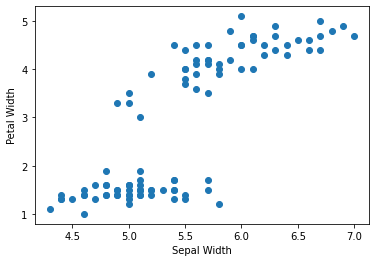

In [7]:
import matplotlib.pyplot as plt

data = iris.data
X = data[:100, [0, 2]]

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')

plt.show()

In [8]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='random', n_init=10, random_state=123)
y_km = km.fit_predict(X)

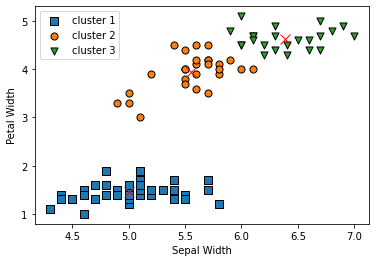

In [15]:
import numpy as np

fig, ax = plt.subplots()
ax.scatter(X[y_km==0, 0], X[y_km==0, 1], s=50, edgecolors='black', marker='s', label='cluster 1')
ax.plot(np.mean(X[y_km==0, 0]), np.mean( X[y_km==0, 1]), marker='x', markersize=10, color='red')

ax.scatter(X[y_km==1, 0], X[y_km==1, 1], s=50, edgecolors='black', marker='o', label='cluster 2')
ax.plot(np.mean(X[y_km==1, 0]), np.mean( X[y_km==1, 1]), marker='x', markersize=10, color='red')

ax.scatter(X[y_km==2, 0], X[y_km==2, 1], s=50, edgecolors='black', marker='v', label='cluster 3')
ax.plot(np.mean(X[y_km==2, 0]), np.mean( X[y_km==2, 1]), marker='x', markersize=10, color='red')

ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')
ax.legend()
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0], dtype=int64)

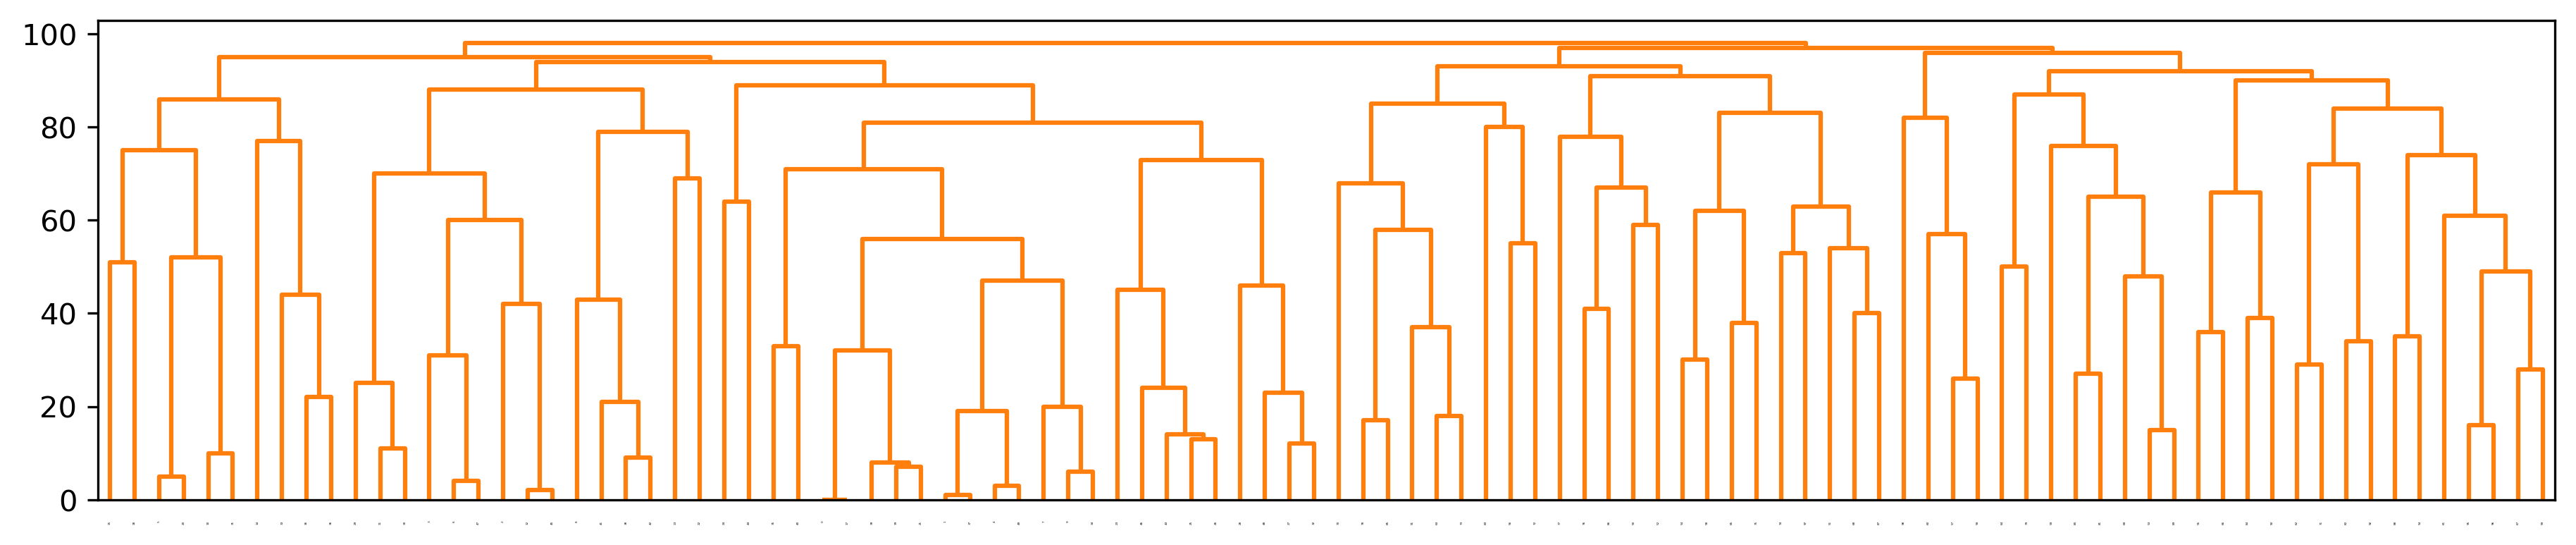

In [17]:
from scipy.cluster.hierarchy import dendrogram

children = ac.children_
distance = np.arange(children.shape[0])
no_of_observations = np.arange(2, children.shape[0]+2)
linkage_matrix = np.hstack((children, distance[:, np.newaxis], no_of_observations[:, np.newaxis])).astype(float)

fig, ax = plt.subplots(figsize=(15,3), dpi=300)
dendrogram(linkage_matrix, labels=np.arange(100), leaf_font_size=0, color_threshold=np.inf)

plt.show()